# Introduction

#### Title: Credit Card Fraud Detection using Anomaly Detection methods
#### Course: Expert Data Mining

<a href='https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'>Dataset link</a>

# Initialization
Import necessary library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.model_selection import train_test_split

# Import Dataset

In [2]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Define input and output

In [3]:
X = credit.drop(labels=['Class'], axis=1)
y = credit.drop(labels=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                      'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
                      'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], axis=1)
print(f'Shape X is {X.shape} and shape y is {y.shape}')

Shape X is (284807, 30) and shape y is (284807, 1)


# Descriptive statistics

In [4]:
data = credit
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data pre-processing (Scaling)

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

# Estimate the normal distribution parameters

In [6]:
class EstimateNormalDistribution:
    def __init__(self, input_column):
        self.input_column = input_column
        
    def __mean(self):
        return np.mean(self.input_column)
    
    def __std(self):
        return np.std(self.input_column)
    
    def __var(self):
        return np.var(self.input_column)
    
    def __median(self):
        return np.median(self.input_column)
    
    def _parameter(self):
        self.m = self.__mean()
        self.median = self.__median()
        self.s = self.__std()
        self.v = self.__var()
        print('      Mean              :  ', self.m)
        print('      Median            :  ', self.median)
        print('      Variance          :  ', self.v)
        print('      Standard Deviation:  ', self.s)


In [7]:
print_list = []
for i in X:
    my_col = EstimateNormalDistribution(X[i])
    print(i)
    print_list.append(my_col._parameter())

Time
      Mean              :   94813.85957508067
      Median            :   84692.0
      Variance          :   2255116088.1243014
      Standard Deviation:   47488.062585499334
V1
      Mean              :   1.1683749838001528e-15
      Median            :   0.0181087991615309
      Variance          :   3.8364757815610053
      Standard Deviation:   1.9586923652174186
V2
      Mean              :   3.416908049651284e-16
      Median            :   0.0654855563960555
      Variance          :   2.7268104503811483
      Standard Deviation:   1.6513056804786777
V3
      Mean              :   -1.379536707896593e-15
      Median            :   0.179846343563544
      Variance          :   2.299021168490918
      Standard Deviation:   1.5162523432763155
V4
      Mean              :   2.0740951198584196e-15
      Median            :   -0.0198465294811989
      Variance          :   2.0046767827603227
      Standard Deviation:   1.4158660892755086
V5
      Mean              :   9.60406631

# data cleaning

## missing values

In [8]:
data.isnull().sum().max()


0

# Apply data reduction techniques(feature Subset Selection and correlation analysis)

In [9]:
print('Fraud', data.loc[data['Class']==1].shape, 'No Fraud', data.loc[data['Class']==0].shape)

Fraud (492, 31) No Fraud (284315, 31)


In [10]:
data_df = data.sample(frac=1)
fraud_df = data.loc[data['Class'] == 1]
no_fraud_df = data.loc[data['Class'] == 0][:492]
under_sample_data = pd.concat([fraud_df, no_fraud_df])

new_data = under_sample_data.sample(frac=1, random_state=42)
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.179976,-0.994079
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.307413,0.812780
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.027947,-0.993104
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,3.007895,0.768888
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,3.226717,0.006967


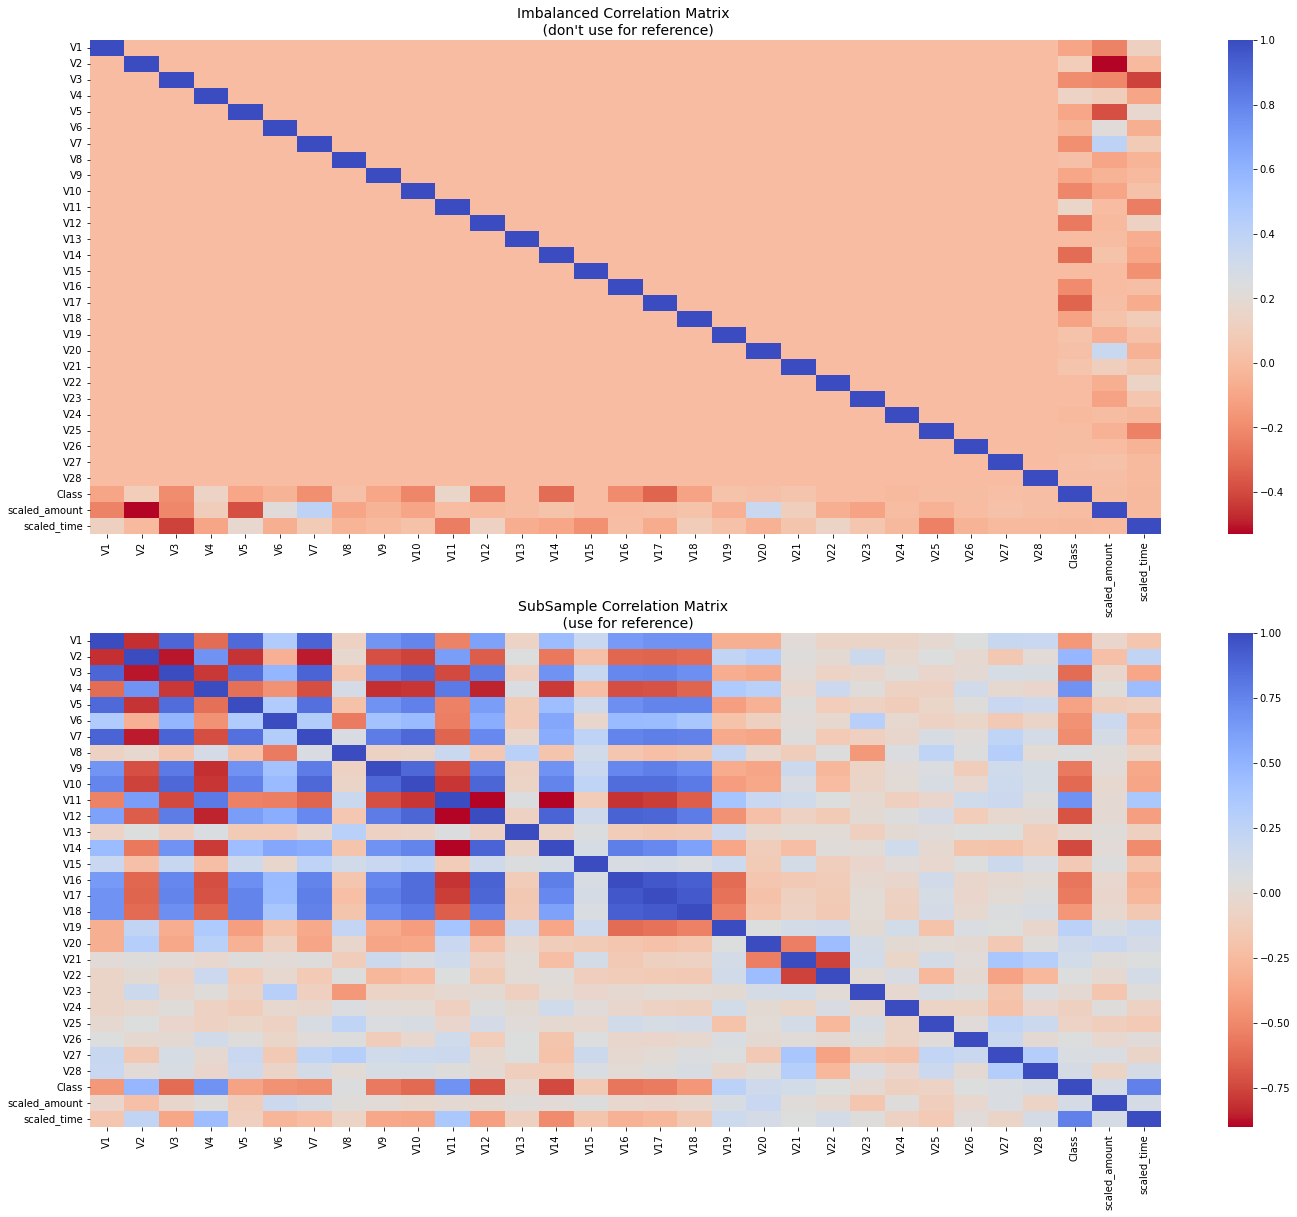

In [11]:
#correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

data_corr = data.corr()
sns.heatmap(data_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


under_sample_corr = under_sample_data.corr()
sns.heatmap(under_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Remove noisy and outlier data

/home/soheil/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soheil/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soheil/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

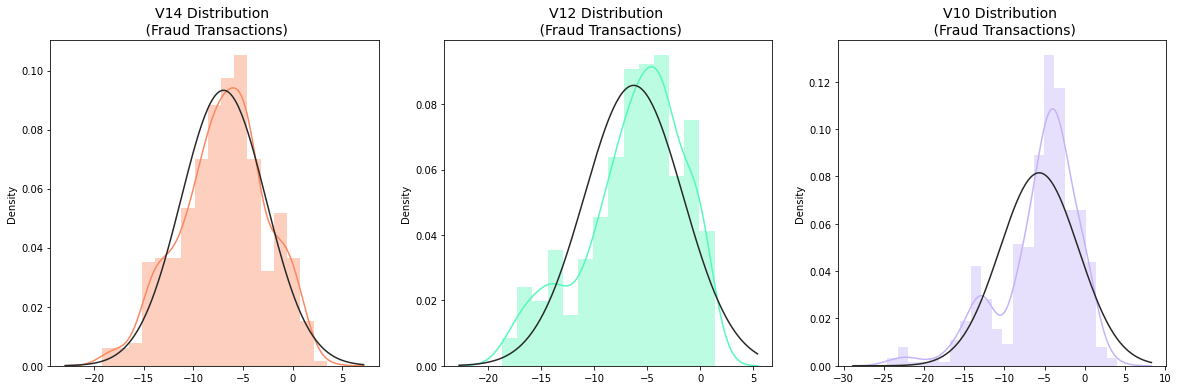

In [12]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = under_sample_data['V14'].loc[under_sample_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = under_sample_data['V12'].loc[under_sample_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = under_sample_data['V10'].loc[under_sample_data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [13]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = under_sample_data['V14'].loc[under_sample_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V14'] > v14_upper) | (under_sample_data['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = under_sample_data['V12'].loc[under_sample_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V12'] > v12_upper) | (under_sample_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(under_sample_data)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = under_sample_data['V10'].loc[under_sample_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
under_sample_data = under_sample_data.drop(under_sample_data[(under_sample_data['V10'] > v10_upper) | (under_sample_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(under_sample_data)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.1241628144947, -16.649628

# Dimention Reduction (PCA) in all column

In [14]:
X_ = under_sample_data.drop('Class', axis=1)
y_ = under_sample_data['Class']

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_)

array([[ 0.8475034 ,  0.40279467, -1.12597431, ..., -0.33227912,
        -0.08274877, -0.08754116],
       [-7.60888085, -1.42563632, -0.30367743, ..., -0.26797858,
        -0.22737174, -0.21799244],
       [-0.52851261,  1.18498788, -1.65037283, ...,  0.44465526,
         0.39911676, -0.10846206],
       ...,
       [-8.29524414, -1.17410143,  0.31861914, ..., -0.38195279,
        -0.06914569,  0.03495399],
       [-8.17591647, -1.22738381,  0.28668916, ...,  0.03692629,
         0.01797912,  0.01521732],
       [-8.04998462, -1.05510644,  0.23062124, ..., -0.01249334,
        -0.03491588,  0.00902392]])

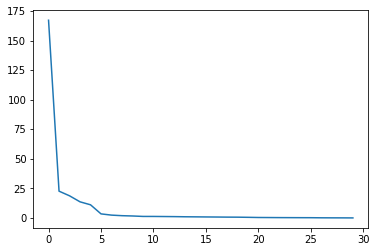

In [16]:
plt.plot(pca.explained_variance_)

In [17]:
print(pca.explained_variance_)

[1.67176566e+02 2.26850873e+01 1.87576587e+01 1.36691381e+01
 1.11600051e+01 3.47636941e+00 2.43240692e+00 1.95654015e+00
 1.70506567e+00 1.32582672e+00 1.31697228e+00 1.23961260e+00
 1.15892432e+00 1.03946138e+00 9.68029459e-01 8.85359823e-01
 8.19993877e-01 7.36393384e-01 6.99547169e-01 5.76118670e-01
 4.27024856e-01 3.79603294e-01 3.29162560e-01 2.97366921e-01
 2.70130871e-01 2.48632487e-01 1.67391371e-01 1.30832715e-01
 1.10793859e-01 6.87417968e-02]


In [18]:
# according to figure choose 5 component 
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X_)

In [19]:
print('shape of input dataset',X_.shape, '\nshape of input dataset after PCA', X_PCA.shape)

shape of input dataset (944, 30) 
shape of input dataset after PCA (944, 5)


# Dimention Reduction (PCA) in V10, V12, V14

In [20]:
X_V10_12_14 = under_sample_data.drop(labels=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11',
                      'V13','V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
                      'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'], axis=1)

y_V10_12_14 = under_sample_data.Class

In [21]:
pca_V10_12_14 = PCA()
X_pca_V10_12_14 = pca_V10_12_14.fit_transform(X_V10_12_14)

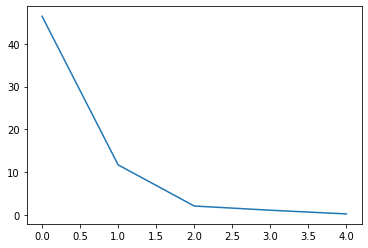

In [22]:
plt.plot(pca_V10_12_14.explained_variance_)

In [23]:
print(pca_V10_12_14.explained_variance_)

[46.4574365  11.71804068  2.10067667  1.11681657  0.25316437]


In [24]:
# as shown in figure choose 2 component 
pca_V10_12_14 = PCA(n_components=2)
X_PCA_V10_12_14 = pca_V10_12_14.fit_transform(X_V10_12_14)

In [25]:
print('shape of input dataset', X_V10_12_14.shape, '\nshape of input dataset after PCA', X_PCA_V10_12_14.shape)

shape of input dataset (944, 5) 
shape of input dataset after PCA (944, 2)


# Classification Rules with feature selection and PCA

Deterministic (Indirect method):

In [26]:
X_train_V10_12_14, X_test_V10_12_14, y_train_V10_12_14, y_test_V10_12_14 = train_test_split(X_PCA_V10_12_14,
                                                                                            y_, test_size=0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn import tree

In [28]:
# for X_PCA_V10_12_14 data
clf_tree = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=10, min_samples_split=10)
clf_tree.fit(X_train_V10_12_14, y_train_V10_12_14)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10)

In [29]:
text_representation = export_text(clf_tree, feature_names=['PCA att 1', 'PCA att 1'])
print(text_representation)

|--- PCA att 1 <= -3.63
|   |--- PCA att 1 <= 2.56
|   |   |--- PCA att 1 <= -1.27
|   |   |   |--- PCA att 1 <= -1.28
|   |   |   |   |--- class: 0
|   |   |   |--- PCA att 1 >  -1.28
|   |   |   |   |--- class: 0
|   |   |--- PCA att 1 >  -1.27
|   |   |   |--- PCA att 1 <= -4.36
|   |   |   |   |--- PCA att 1 <= -0.67
|   |   |   |   |   |--- PCA att 1 <= -0.77
|   |   |   |   |   |   |--- PCA att 1 <= -5.84
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PCA att 1 >  -5.84
|   |   |   |   |   |   |   |--- PCA att 1 <= -1.17
|   |   |   |   |   |   |   |   |--- PCA att 1 <= -1.18
|   |   |   |   |   |   |   |   |   |--- PCA att 1 <= -5.23
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- PCA att 1 >  -5.23
|   |   |   |   |   |   |   |   |   |   |--- PCA att 1 <= -1.22
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- PCA att 1 >  -1.22
|   |   

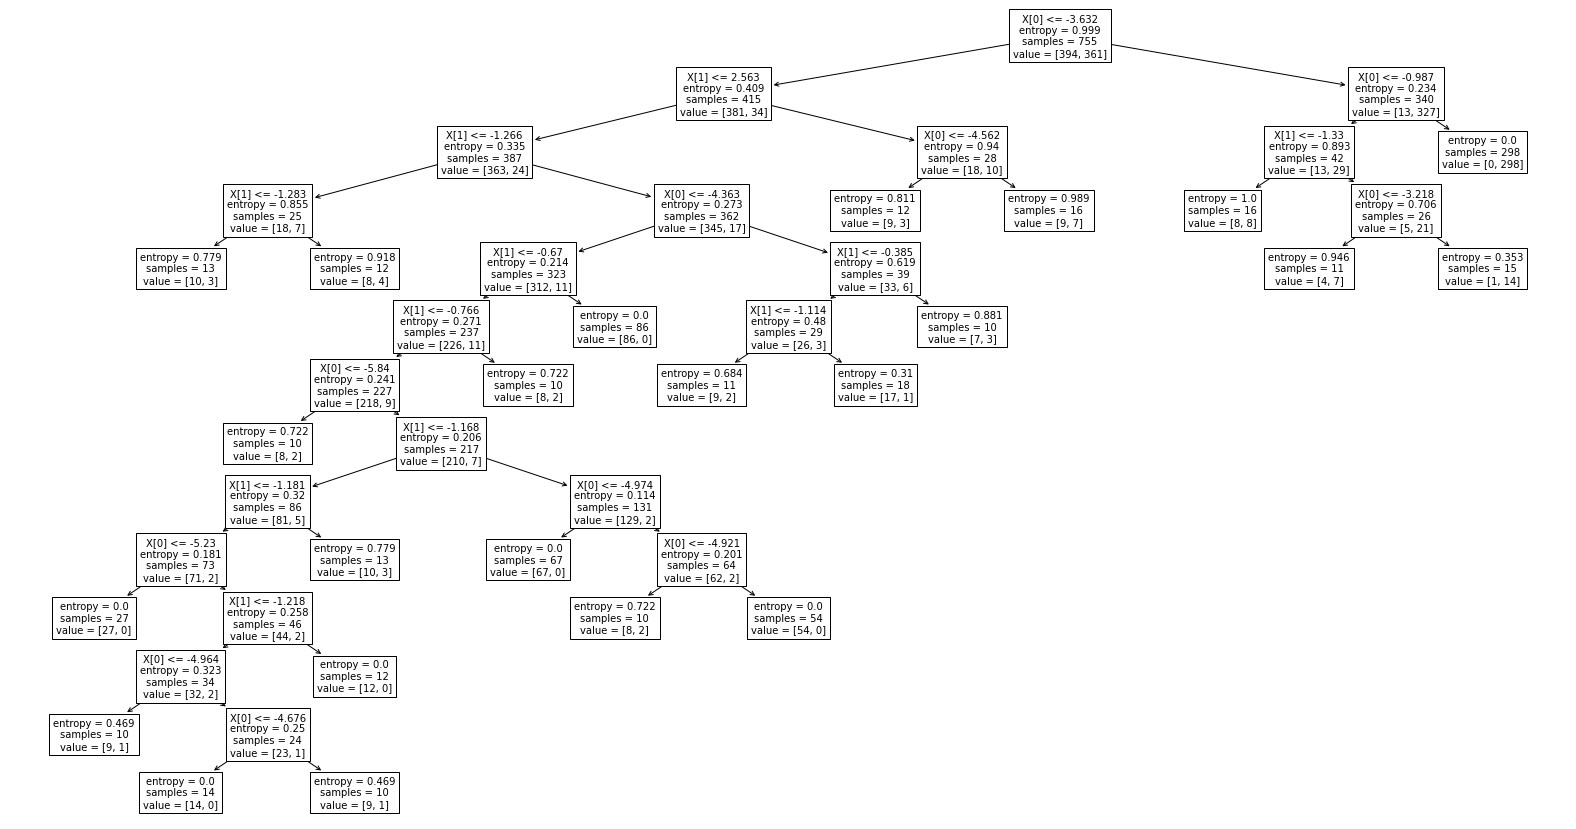

In [30]:
plt.figure(figsize=(28,15))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

# Dimention Reduction (Autoencoder) in all column

In [31]:
import keras
import tensorflow as tf

2021-12-24 20:20:36.136390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-24 20:20:36.136407: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## build a simple autoencoder

In [32]:
# train test split
x_train_autoencoder, x_test_autoencoder, y_train_autoencoder, y_test_autoencoder = train_test_split(X_, y_, test_size=0.3)

In [33]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler().fit(x_train_autoencoder)
x_train_autoencoder, x_test_autoencoder = scaler_minmax.transform(x_train_autoencoder), scaler_minmax.transform(x_test_autoencoder)

In [34]:
input_shape = keras.Input(shape=(30,))
encoded = keras.layers.Dense(5, activation='relu')(input_shape)
decoded = keras.layers.Dense(30, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_shape, decoded)
encoder = keras.Model(input_shape, encoded)
decoder_layer = autoencoder.layers[-1]
encoded_input = keras.Input(shape=(5,))
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

2021-12-24 20:20:38.565586: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-24 20:20:38.565627: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (soheil-TUF-GAMING-FX504GD-FX80GD): /proc/driver/nvidia/version does not exist
2021-12-24 20:20:38.566118: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='binary_crossentropy')
autoencoder.fit(x_train_autoencoder, x_train_autoencoder,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test_autoencoder, x_test_autoencoder))

2021-12-24 20:20:38.647481: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
7/7 [==============================] - 0s 21ms/step - loss: 0.7118 - binary_crossentropy: 0.7118 - val_loss: 0.7080 - val_binary_crossentropy: 0.7080
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7048 - binary_crossentropy: 0.7048 - val_loss: 0.7016 - val_binary_crossentropy: 0.7016
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6992 - binary_crossentropy: 0.6992 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6913 - binary_crossentropy: 0.6913 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 7/50
7/7 [=======================

In [36]:
encoded_input_1 = encoder.predict(x_test_autoencoder)
encoded_input_tr = encoder.predict(x_train_autoencoder)
decoded_input_1 = decoder.predict(encoded_input_1)

In [37]:
x_train_encoded_l1, x_test_encoded_l1 = encoder(x_train_autoencoder), encoder(x_test_autoencoder)

# Classification Rules without feature selection and autoencoder

Deterministic Models (Indirect methods)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn import tree

In [39]:
# classification rules (decision tree)
# for dimention reduction with autoencoder data
clf_tree_ = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=10, min_samples_split=10)
clf_tree_.fit(x_train_encoded_l1, y_train_autoencoder)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10)

In [40]:
feature_names_auto = ['PCA att 1',
                      'PCA att 2',
                      'PCA att 3',
                      'PCA att 4',
                      'PCA att 5']

In [41]:
text_representation_auto = export_text(clf_tree_, feature_names=feature_names_auto)
print(text_representation_auto)

|--- PCA att 4 <= 2.77
|   |--- PCA att 4 <= 2.53
|   |   |--- class: 1
|   |--- PCA att 4 >  2.53
|   |   |--- PCA att 5 <= 2.46
|   |   |   |--- PCA att 4 <= 2.62
|   |   |   |   |--- class: 1
|   |   |   |--- PCA att 4 >  2.62
|   |   |   |   |--- class: 0
|   |   |--- PCA att 5 >  2.46
|   |   |   |--- PCA att 4 <= 2.70
|   |   |   |   |--- class: 1
|   |   |   |--- PCA att 4 >  2.70
|   |   |   |   |--- class: 1
|--- PCA att 4 >  2.77
|   |--- PCA att 5 <= 2.71
|   |   |--- PCA att 4 <= 2.94
|   |   |   |--- PCA att 5 <= 2.43
|   |   |   |   |--- PCA att 4 <= 2.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PCA att 4 >  2.83
|   |   |   |   |   |--- class: 0
|   |   |   |--- PCA att 5 >  2.43
|   |   |   |   |--- PCA att 4 <= 2.81
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PCA att 4 >  2.81
|   |   |   |   |   |--- PCA att 5 <= 2.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- PCA att 5 >  2.45
|   |   |   |   |   |   |--- PCA att 5 <= 2.50

# Dimention Reduction (Autoencoder) in V10, V12, V14

In [42]:
import keras
import tensorflow as tf

In [43]:
# train test split
x_train_autoencoder_v10, x_test_autoencoder_v10, y_train_autoencoder_v10, y_test_autoencoder_v10 = train_test_split(X_V10_12_14, y_V10_12_14, test_size=0.3)

In [44]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax_v10 = MinMaxScaler().fit(x_train_autoencoder_v10)
x_train_autoencoder_v10, x_test_autoencoder_v10 = scaler_minmax_v10.transform(x_train_autoencoder_v10), scaler_minmax_v10.transform(x_test_autoencoder_v10)

## build a simple autoencoder

In [45]:
input_shape_v10 = keras.Input(shape=(5,))
encoded_v10 = keras.layers.Dense(2, activation='relu')(input_shape_v10)
decoded_v10 = keras.layers.Dense(5, activation='sigmoid')(encoded_v10)
autoencoder_v10 = keras.Model(input_shape_v10, decoded_v10)
encoder_v10 = keras.Model(input_shape_v10, encoded_v10)
decoder_layer_v10 = autoencoder_v10.layers[-1]
encoded_input_v10 = keras.Input(shape=(2,))
decoder_v10 = keras.Model(encoded_input_v10, decoder_layer_v10(encoded_input_v10))

In [46]:
autoencoder_v10.compile(optimizer='adam', loss='binary_crossentropy', metrics='binary_crossentropy')
autoencoder_v10.fit(x_train_autoencoder_v10, x_train_autoencoder_v10,
                epochs=50,
                batch_size=20,
                shuffle=True,
                validation_data=(x_test_autoencoder_v10, x_test_autoencoder_v10))

Epoch 1/50
33/33 [==============================] - 0s 3ms/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6771 - val_binary_crossentropy: 0.6771
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6688 - binary_crossentropy: 0.6688 - val_loss: 0.6640 - val_binary_crossentropy: 0.6640
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6558 - binary_crossentropy: 0.6558 - val_loss: 0.6506 - val_binary_crossentropy: 0.6506
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6426 - binary_crossentropy: 0.6426 - val_loss: 0.6375 - val_binary_crossentropy: 0.6375
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6298 - binary_crossentropy: 0.6298 - val_loss: 0.6246 - val_binary_crossentropy: 0.6246
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6172 - binary_crossentropy: 0.6172 - val_loss: 0.6122 - val_binary_crossentropy: 0.6122
Epoch 7/50
33/33 [==========

In [47]:
encoded_input_1_v10 = encoder_v10.predict(x_test_autoencoder_v10)
encoded_input_tr_v10 = encoder_v10.predict(x_train_autoencoder_v10)
decoded_input_1_v10 = decoder_v10.predict(encoded_input_1_v10)

In [48]:
x_train_encoded_l1_v10, x_test_encoded_l1_v10 = encoder_v10(x_train_autoencoder_v10), encoder_v10(x_test_autoencoder_v10)

# Classification Rules with feature selection and autoencoder

Deterministic (Indirect method):

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn import tree

In [50]:
# for X_PCA_V10_12_14 data
clf_tree_auto_v10 = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=10, min_samples_split=10)
clf_tree_auto_v10.fit(encoded_input_tr_v10, y_train_autoencoder_v10)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10)

In [51]:
x_test_autoencoder_v10.shape

(284, 5)

In [52]:
feature_names_auto_v10 = ['PCA att 1',
                          'PCA att 2']

In [53]:
text_representation_auto_v10 = export_text(clf_tree_auto_v10, feature_names=feature_names_auto_v10)
print(text_representation_auto_v10)

|--- PCA att 2 <= 2.25
|   |--- PCA att 2 <= 1.85
|   |   |--- class: 1
|   |--- PCA att 2 >  1.85
|   |   |--- PCA att 2 <= 2.12
|   |   |   |--- PCA att 2 <= 1.98
|   |   |   |   |--- class: 1
|   |   |   |--- PCA att 2 >  1.98
|   |   |   |   |--- class: 1
|   |   |--- PCA att 2 >  2.12
|   |   |   |--- class: 1
|--- PCA att 2 >  2.25
|   |--- PCA att 2 <= 2.44
|   |   |--- PCA att 2 <= 2.44
|   |   |   |--- class: 0
|   |   |--- PCA att 2 >  2.44
|   |   |   |--- class: 0
|   |--- PCA att 2 >  2.44
|   |   |--- class: 0



In [54]:
y_train_autoencoder_v10

42700     1
79874     1
144108    1
120       0
251       0
         ..
191359    1
141259    1
44001     1
366       0
79835     1
Name: Class, Length: 660, dtype: int64

# Classification Rules for best model in deterministic model (with feature selection and autoencoder)
Non-deterministic Models based on probability theory (Bayes Classifier)

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
clf_model_nb = GaussianNB()
clf_model_nb.fit(encoded_input_tr_v10, y_train_autoencoder_v10)

GaussianNB()

# Classification Rules for best model in deterministic model (with feature selection and PCA)
Non-deterministic Models based on fuzzy logic

In [57]:
print(export_text(clf_tree_auto_v10))

|--- feature_1 <= 2.25
|   |--- feature_1 <= 1.85
|   |   |--- class: 1
|   |--- feature_1 >  1.85
|   |   |--- feature_1 <= 2.12
|   |   |   |--- feature_1 <= 1.98
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.98
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  2.12
|   |   |   |--- class: 1
|--- feature_1 >  2.25
|   |--- feature_1 <= 2.44
|   |   |--- feature_1 <= 2.44
|   |   |   |--- class: 0
|   |   |--- feature_1 >  2.44
|   |   |   |--- class: 0
|   |--- feature_1 >  2.44
|   |   |--- class: 0



In [58]:
encoded_input_1_v10.shape

(284, 2)

In [59]:
encoded_input_1_v10[:, 1].min()
encoded_input_1_v10[:, 1].max()

2.6910021

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

In [61]:
ns_probs = [0 for _ in range(len(y_test_V10_12_14))]

In [62]:
# Classification Rules with feature selection and PCA (Deterministic (Indirect method))
y_pre_V10_12_14 = clf_tree.predict(X_test_V10_12_14)
dtree_v10_12_14_probs = clf_tree.predict_proba(X_test_V10_12_14)
print('confusion matrix:\n', confusion_matrix(y_test_V10_12_14, y_pre_V10_12_14).T,
      '\nclassification report:\n', classification_report(y_test_V10_12_14, y_pre_V10_12_14))

confusion matrix:
 [[92 10]
 [ 1 86]] 
classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        93
           1       0.99      0.90      0.94        96

    accuracy                           0.94       189
   macro avg       0.95      0.94      0.94       189
weighted avg       0.95      0.94      0.94       189



In [63]:
dtree_v10_12_14_probs = dtree_v10_12_14_probs[:, 1]

In [64]:
# calculate scores
ns_auc = roc_auc_score(y_test_V10_12_14, ns_probs)
dtree_v10_12_14_probs_auc = roc_auc_score(y_test_V10_12_14, dtree_v10_12_14_probs)

In [65]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dtree_v10_12_14_probs_auc))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.974


In [66]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_V10_12_14, ns_probs)
dtree_v10_12_14_fpr, dtree_v10_12_14__tpr, _ = roc_curve(y_test_V10_12_14, dtree_v10_12_14_probs)

In [67]:
# Classification Rules without feature selection and autoencoder (Deterministic Models (Indirect methods))
y_pre_auto_tree = clf_tree_.predict(x_test_encoded_l1)
print('confusion matrix:\n', confusion_matrix(y_test_autoencoder, y_pre_auto_tree).T, '\nclassification report:\n', classification_report(y_test_autoencoder, y_pre_auto_tree))

confusion matrix:
 [[155  18]
 [  1 110]] 
classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       156
           1       0.99      0.86      0.92       128

    accuracy                           0.93       284
   macro avg       0.94      0.93      0.93       284
weighted avg       0.94      0.93      0.93       284



In [68]:
# Classification Rules with feature selection and autoencoder (Deterministic (Indirect method))
y_pre_auto_V10 = clf_tree_auto_v10.predict(encoded_input_1_v10)
y_pre_auto_V10_probs = clf_tree_auto_v10.predict_proba(encoded_input_1_v10)

print('confusion matrix:\n', confusion_matrix(y_test_autoencoder_v10, y_pre_auto_V10).T,
      '\nclassification report:\n', classification_report(y_test_autoencoder_v10, y_pre_auto_V10))

confusion matrix:
 [[144   1]
 [  9 130]] 
classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       153
           1       0.94      0.99      0.96       131

    accuracy                           0.96       284
   macro avg       0.96      0.97      0.96       284
weighted avg       0.97      0.96      0.96       284



In [69]:
y_pre_auto_V10_probs = y_pre_auto_V10_probs[:, 1]

In [70]:
# calculate scores
y_pre_auto_V10_probs__auc = roc_auc_score(y_test_autoencoder_v10, y_pre_auto_V10_probs)

In [71]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (y_pre_auto_V10_probs__auc))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.985


In [72]:
y_pre_auto_V10_fpr, y_pre_auto_V10_tpr, _ = roc_curve(y_test_autoencoder_v10, y_pre_auto_V10_probs)

In [73]:
# Classification Rules for best model in deterministic model (with feature selection and autoencoder)
# Non-deterministic Models based on probability theory (Bayes Classifier)

y_pre_auto_nb = clf_model_nb.predict(encoded_input_1_v10)
y_pre_auto_nb_probs = clf_model_nb.predict_proba(encoded_input_1_v10)

print('confusion matrix:\n', confusion_matrix(y_test_autoencoder_v10, y_pre_auto_nb).T, '\nclassification report:\n', classification_report(y_test_autoencoder_v10, y_pre_auto_nb))

confusion matrix:
 [[145   2]
 [  8 129]] 
classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.94      0.98      0.96       131

    accuracy                           0.96       284
   macro avg       0.96      0.97      0.96       284
weighted avg       0.97      0.96      0.96       284



In [74]:
y_pre_auto_nb_probs = y_pre_auto_nb_probs[:, 1]

In [75]:
# calculate scores
y_pre_auto_nb_probs_auc = roc_auc_score(y_test_autoencoder_v10, y_pre_auto_nb)

In [76]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (y_pre_auto_nb_probs_auc))

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.966


In [77]:
y_pre_auto_nb_fpr, y_pre_auto_nb_tpr, _ = roc_curve(y_test_autoencoder_v10, y_pre_auto_nb)

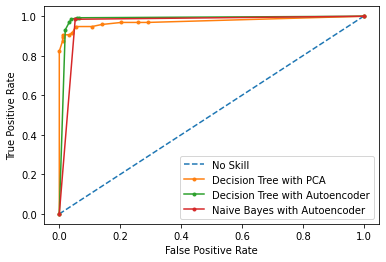

In [78]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dtree_v10_12_14_fpr, dtree_v10_12_14__tpr, marker='.', label='Decision Tree with PCA')
plt.plot(y_pre_auto_V10_fpr, y_pre_auto_V10_tpr, marker='.', label='Decision Tree with Autoencoder')
plt.plot(y_pre_auto_nb_fpr, y_pre_auto_nb_tpr, marker='.', label='Naive Bayes with Autoencoder')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [64]:
import skfuzzy as fuzz

In [65]:
feature_1 = encoded_input_1_v10[:, 0,]
feature_2 = encoded_input_1_v10[:, 1,]

In [66]:
# Generate fuzzy membership functions
feature_1_lo = fuzz.trimf(feature_1, [0, 0, 5])
feature_1_md = fuzz.trimf(feature_1, [0, 5, 10])
feature_1_hi = fuzz.trimf(feature_1, [5, 10, 10])

feature_2_lo = fuzz.trimf(feature_2, [0, 0, 5])
feature_2_md = fuzz.trimf(feature_2, [0, 5, 10])
feature_2_hi = fuzz.trimf(feature_2, [5, 10, 10])

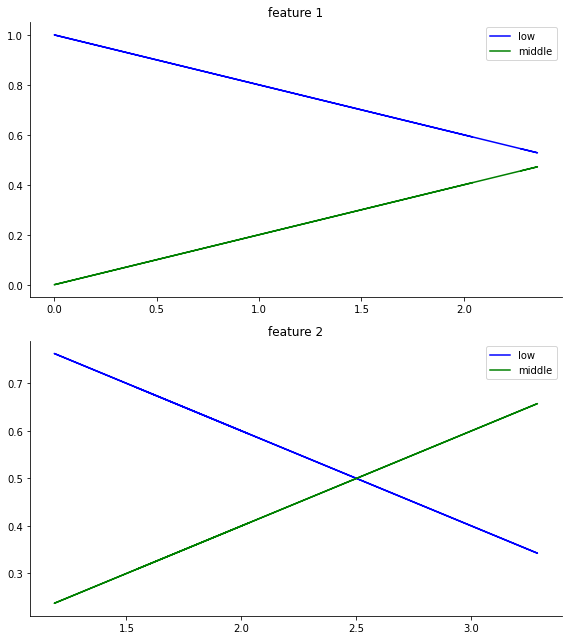

In [67]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(feature_1, feature_1_lo, 'b', linewidth=1.5, label='low')
ax0.plot(feature_1, feature_1_md, 'g', linewidth=1.5, label='middle')
ax0.set_title('feature 1')
ax0.legend()

ax1.plot(feature_2, feature_2_lo, 'b', linewidth=1.5, label='low')
ax1.plot(feature_2, feature_2_md, 'g', linewidth=1.5, label='middle')
ax1.set_title('feature 2')
ax1.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


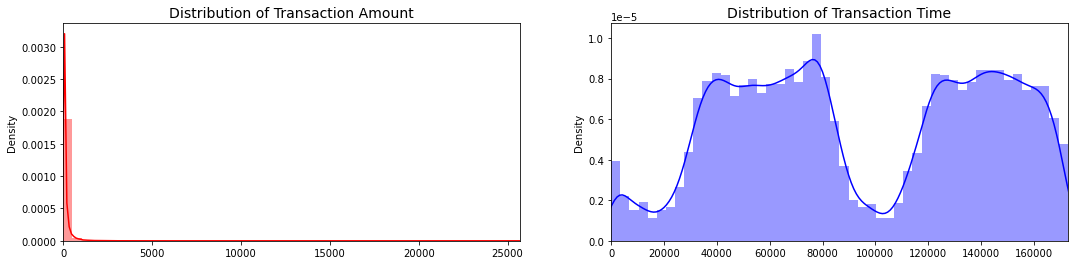

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = X['Amount'].values
time_val = X['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# Scatterplot

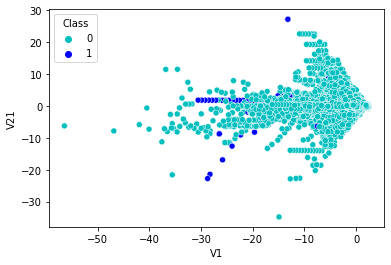

In [79]:
sns.scatterplot(data=data,
                x='V1',
                y='V21',
                hue='Class',
                palette=['c','b'])
plt.show()

In [9]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [26]:
#Calculate mean and Standard deviation.
column_time = X.Time
mean_time = np.mean(column_time)
sd_time = np.std(column_time)
 
#Apply function to the data.
pdf_time = normal_dist(column_time,mean_time,sd_time)
    

#Plotting the Results
plt.plot(column_time,pdf_time , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')


NameError: name 'normal_dist' is not defined

In [19]:
print(f'Time Mean: {mean_time}, Standard Deviation: {sd_time}')

Time: Mean: 94813.85957508067, Standard Deviation: 47488.06258549898
